In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [8]:

for col in ['Month', 'City', 'Company']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


for col in ['Units_Consumed', 'Bill_Amount']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
x_mean = df["MonthlyHours"].mean()
y_mean = df["ElectricityBill"].mean()
print("\nMean of Monthly Hours:", x_mean)
print("Mean of Electricity Bill:", y_mean)




Mean of Monthly Hours: 515.0832065277318
Mean of Electricity Bill: 4311.771306649024


In [15]:

numerator = ((df["MonthlyHours"] - x_mean) * (df["ElectricityBill"] - y_mean)).sum()
denominator = ((df["MonthlyHours"] - x_mean) ** 2).sum()

B1 = numerator / denominator
print("\nCalculated Slope (B1):", B1)



Calculated Slope (B1): 8.396294112929326


In [16]:
B0 = y_mean - (B1 * x_mean)
print("Calculated Intercept (B0):", B0)

Calculated Intercept (B0): -13.018787988530676


In [17]:
df["Predicted_ElectricityBill"] = B0 + B1 * df["MonthlyHours"]


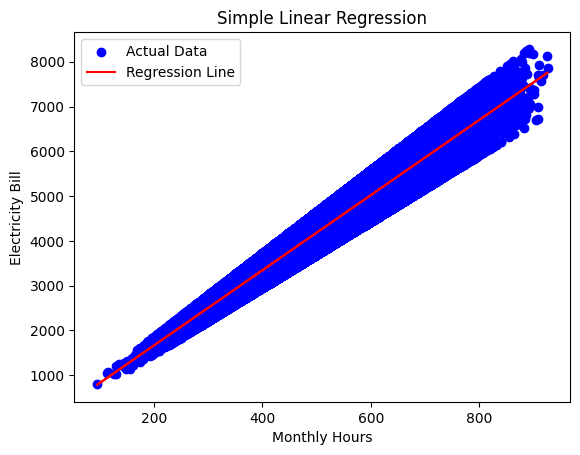

In [18]:
plt.scatter(df["MonthlyHours"], df["ElectricityBill"], color='blue', label="Actual Data")
plt.plot(df["MonthlyHours"], df["Predicted_ElectricityBill"], color='red', label="Regression Line")
plt.xlabel("Monthly Hours")
plt.ylabel("Electricity Bill")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [19]:
rmse = np.sqrt(((df["ElectricityBill"] - df["Predicted_ElectricityBill"]) ** 2).mean())
print("\nRoot Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 305.4237391524915
